In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

100% 324M/325M [00:19<00:00, 19.0MB/s]
100% 325M/325M [00:19<00:00, 17.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-cancer-malignant-vs-benign.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#importing required liabraries
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [ ]:
img_size=(224,224)
batch_size=32

In [ ]:
train_path='/content/train'
valid_path='/content/test'

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,horizontal_flip=True)

In [ ]:
valid_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
#Generating training data
train_generator=train_datagen.flow_from_directory(train_path,target_size=img_size,batch_size=batch_size,class_mode='binary')

Found 2637 images belonging to 2 classes.


In [ ]:
#Generating test data

valid_generator=valid_datagen.flow_from_directory(valid_path,target_size=img_size,batch_size=batch_size,class_mode='binary')

Found 660 images belonging to 2 classes.


In [ ]:
#importing ResNet50 model
resnet=ResNet50(include_top=False,weights='imagenet',input_shape=img_size+(3,))

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
#Making ResNet layers non-trainable
for layer in resnet.layers:
  layer.trainable=False

In [ ]:
#Adding a flatten layer with droput of 0.5 and an output layer
x=Flatten()(resnet.output)
x=Dropout(0.5)(x)
x=Dense(1,activation='sigmoid')(x)

In [ ]:
#importing the model
model=Model(inputs=resnet.input,outputs=x)

In [ ]:
#Compiling the model with parameters
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Training the model
model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=30,validation_data=valid_generator,validation_steps=len(valid_generator))

<ipython-input-16-91c510be72ff>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=30,validation_data=valid_generator,validation_steps=len(valid_generator))


Epoch 1/30
83/83 [==============================] - 54s 504ms/step - loss: 1.7765 - accuracy: 0.7937 - val_loss: 1.1494 - val_accuracy: 0.8318
Epoch 2/30
83/83 [==============================] - 42s 505ms/step - loss: 1.3306 - accuracy: 0.8301 - val_loss: 1.3731 - val_accuracy: 0.8530
Epoch 3/30
83/83 [==============================] - 40s 484ms/step - loss: 1.5677 - accuracy: 0.8354 - val_loss: 2.3629 - val_accuracy: 0.7894
Epoch 4/30
83/83 [==============================] - 39s 473ms/step - loss: 1.6411 - accuracy: 0.8468 - val_loss: 1.7091 - val_accuracy: 0.8242
Epoch 5/30
83/83 [==============================] - 39s 475ms/step - loss: 1.5827 - accuracy: 0.8506 - val_loss: 1.5509 - val_accuracy: 0.8621
Epoch 6/30
83/83 [==============================] - 40s 479ms/step - loss: 1.5636 - accuracy: 0.8639 - val_loss: 1.6682 - val_accuracy: 0.8561
Epoch 7/30
83/83 [==============================] - 40s 485ms/step - loss: 1.6621 - accuracy: 0.8548 - val_loss: 2.1809 - val_accuracy: 0.8591

In [ ]:
img_size = (224, 224)


In [ ]:
# Load and preprocess the image
from tensorflow.keras.preprocessing import image


In [ ]:
def predict(image_path):
    img = image.load_img(image_path, target_size=img_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)

    plt.imshow(img)
    print('Predicted class:', 'malignant' if preds[0][0] > 0.5 else 'benign')
    print('Probability:', preds[0][0]  if preds[0][0]>0.5 else 1-preds[0][0])

1/1 [==============================] - 1s 1s/step
Predicted class: benign
Probability: 0.9979951789136976


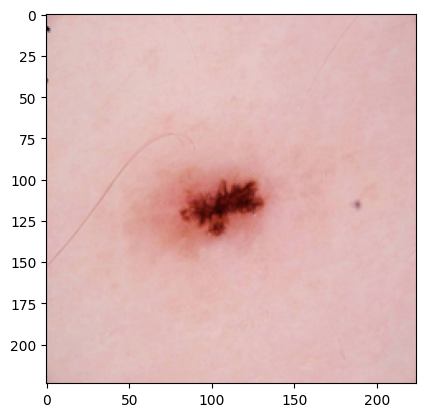

In [ ]:
predict("1.jpg")

1/1 [==============================] - 0s 24ms/step
Predicted class: benign
Probability: 1.0


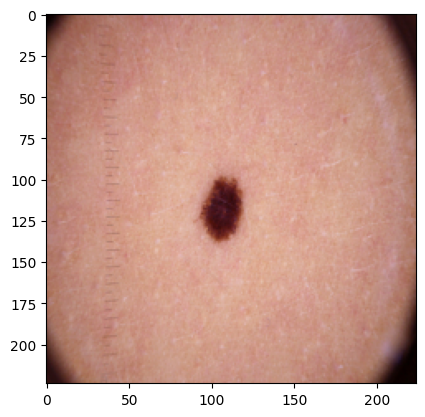

In [ ]:
predict("2.jpg")

1/1 [==============================] - 0s 23ms/step
Predicted class: malignant
Probability: 0.9999536


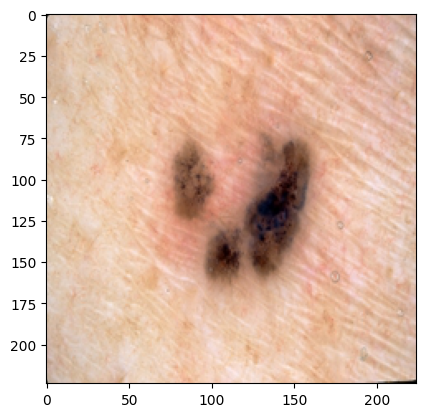

In [ ]:
predict("303.jpg")

1/1 [==============================] - 0s 30ms/step
Predicted class: malignant
Probability: 1.0


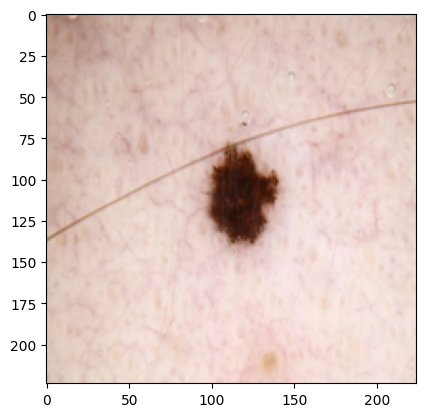

In [ ]:
predict("71.jpg")

1/1 [==============================] - 0s 27ms/step
Predicted class: malignant
Probability: 1.0


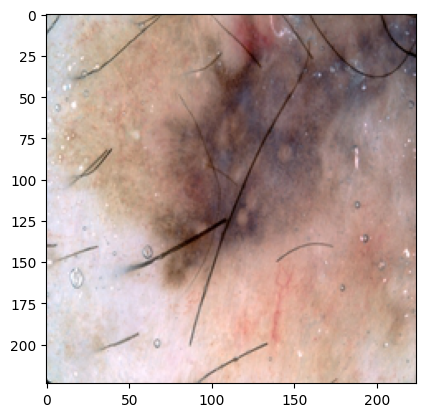

In [ ]:
predict("307.jpg")

1/1 [==============================] - 0s 23ms/step
Predicted class: malignant
Probability: 1.0


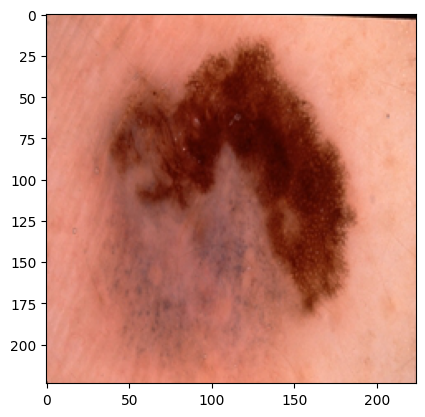

In [ ]:
predict("310.jpg")

1/1 [==============================] - 0s 24ms/step
Predicted class: malignant
Probability: 1.0


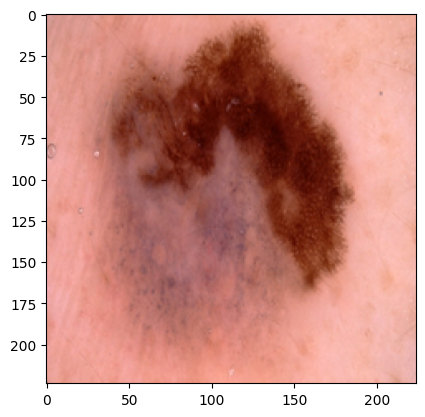

In [ ]:
predict("317.jpg")

1/1 [==============================] - 0s 23ms/step
Predicted class: malignant
Probability: 1.0


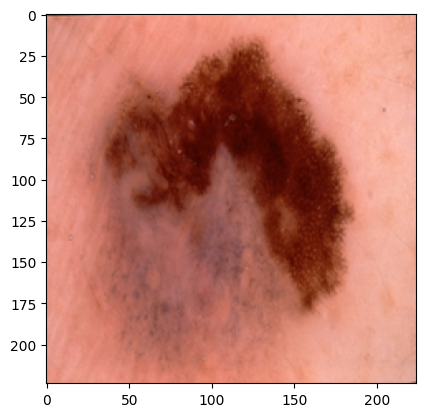

In [ ]:
predict("318.jpg")

1/1 [==============================] - 0s 24ms/step
Predicted class: benign
Probability: 0.9844148373231292


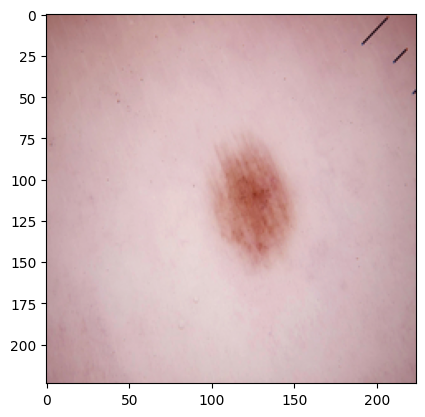

In [ ]:
predict("5.jpg")

1/1 [==============================] - 0s 22ms/step
Predicted class: benign
Probability: 1.0


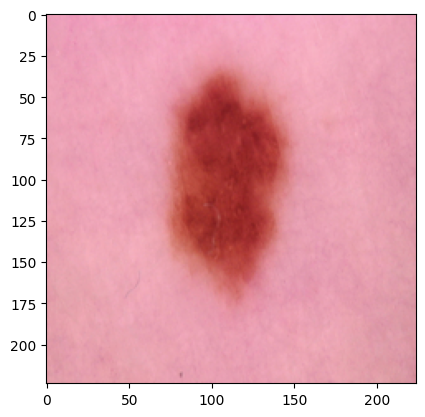

In [ ]:
predict("8.jpg")

In [ ]:
import pickle

# Save the model as a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>